In [ ]:
# importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Modèles de apprentissage automatique par sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import seaborn as sns
import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wordcloud
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets for project/Hotel_Reviews.csv')


In [ ]:
df.Hotel_Name.value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Ibis Styles Milano Palmanova                           12
Hotel Eitlj rg                                         12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

In [ ]:
df.Average_Score.value_counts().sort_values()

9.8       28
5.2       65
6.6      400
7.2      684
9.6      915
6.7      965
6.4     1163
9.5     1207
6.8     1335
6.9     1737
7.0     3899
7.3     3997
7.4     6300
7.6     6684
7.1     6780
9.4     9339
7.7    11829
9.3    12659
9.2    12935
7.5    13720
7.9    15194
7.8    19895
9.0    21051
9.1    21379
8.0    22342
8.9    28520
8.8    30836
8.3    32880
8.2    34847
8.6    36945
8.7    37798
8.5    38066
8.1    38122
8.4    41222
Name: Average_Score, dtype: int64

In [ ]:
df.corr()


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Additional_Number_of_Scoring,1.000000,-0.152846,0.029195,0.824884,-0.053087,-0.071969,-0.061554,0.336295,-0.295732
Average_Score,-0.152846,1.000000,-0.112323,-0.179568,0.106719,0.036454,0.364351,-0.108642,0.106078
Review_Total_Negative_Word_Counts,0.029195,-0.112323,1.000000,0.035124,0.119613,0.003199,-0.382474,0.019112,-0.020002
Total_Number_of_Reviews,0.824884,-0.179568,0.035124,1.000000,-0.030132,-0.024910,-0.072865,0.100295,-0.014141
Review_Total_Positive_Word_Counts,-0.053087,0.106719,0.119613,-0.030132,1.000000,0.026535,0.220800,-0.037567,0.035471
Total_Number_of_Reviews_Reviewer_Has_Given,-0.071969,0.036454,0.003199,-0.024910,0.026535,1.000000,0.002873,-0.059793,0.110810
Reviewer_Score,-0.061554,0.364351,-0.382474,-0.072865,0.220800,0.002873,1.000000,-0.036562,0.034001
lat,0.336295,-0.108642,0.019112,0.100295,-0.037567,-0.059793,-0.036562,1.000000,-0.304524
lng,-0.295732,0.106078,-0.020002,-0.014141,0.035471,0.110810,0.034001,-0.304524,1.000000


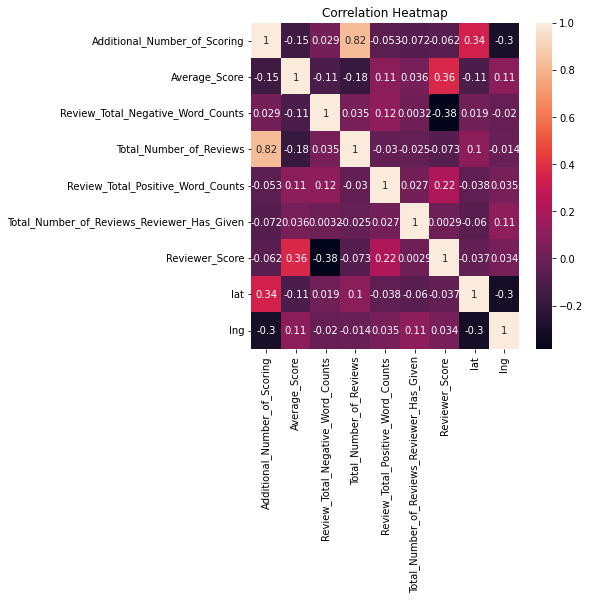

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
df.rename(index=str,columns={"past_3_years_bike_related_purchases":"Past_3y_p"},inplace=True)
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Heatmap');

In [ ]:
Average_Score=df.groupby('Hotel_Name').sum().Average_Score.sort_values(ascending=False).head(10)
Average_Score

Hotel_Name
Park Plaza Westminster Bridge London                 36270.3
Strand Palace Hotel                                  34473.6
Britannia International Hotel Canary Wharf           34001.9
Copthorne Tara Hotel London Kensington               28981.8
DoubleTree by Hilton Hotel London Tower of London    27944.4
Intercontinental London The O2                       23979.4
Grand Royale London Hyde Park                        22776.6
Holiday Inn London Kensington                        21590.4
Millennium Gloucester Hotel London                   20007.0
Hilton London Metropole                              19710.0
Name: Average_Score, dtype: float64

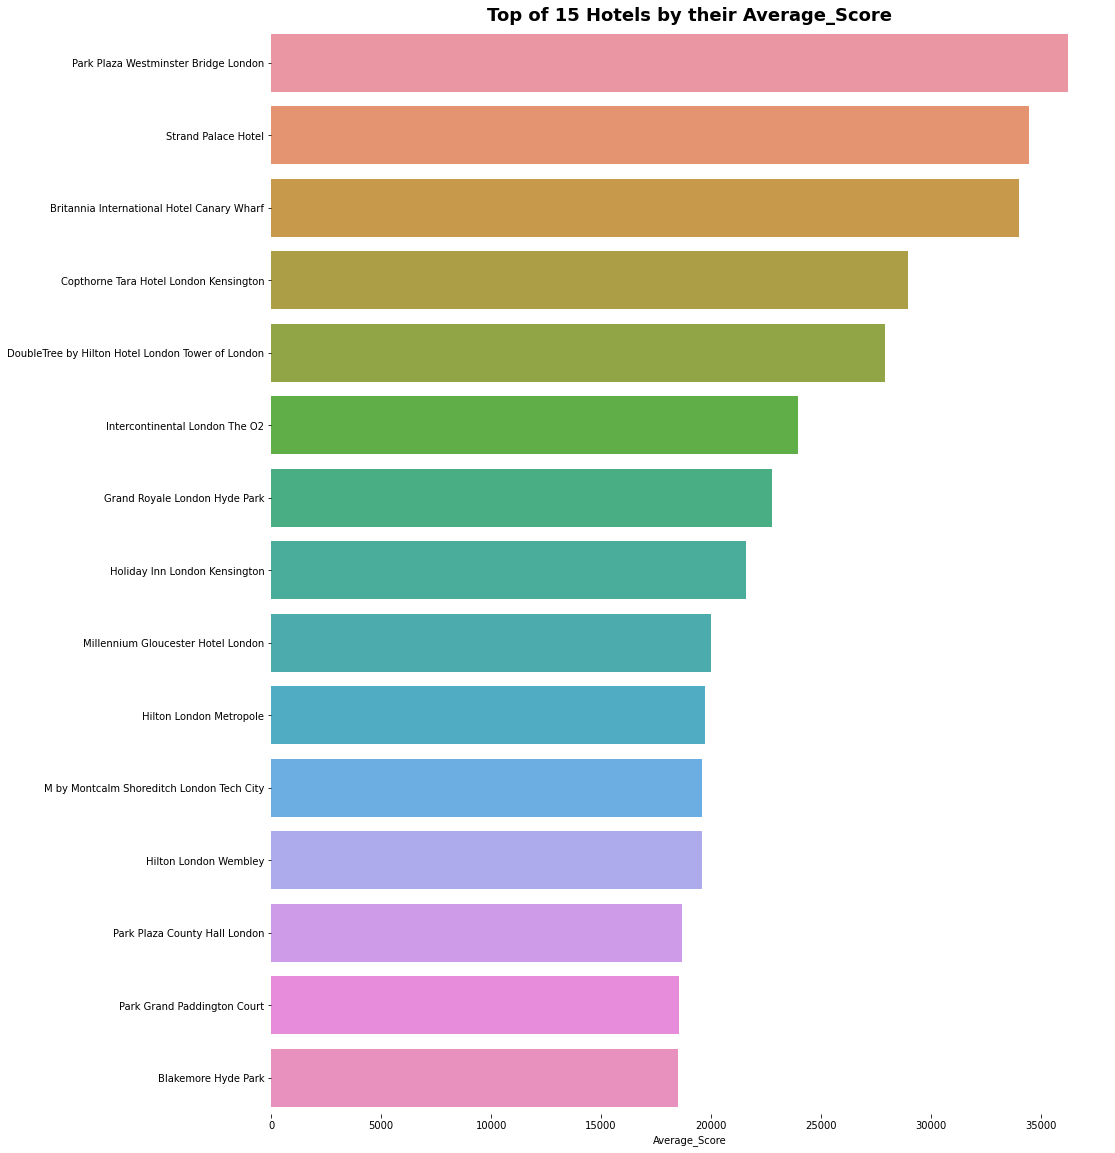

In [ ]:
plt.figure(figsize=(15,20))
Reviews_by_Hotel_Name=df.groupby('Hotel_Name').sum().Average_Score.sort_values(ascending=False).head(15).to_frame().reset_index()
sns.barplot(data=Reviews_by_Hotel_Name,y='Hotel_Name',x='Average_Score')
sns.despine(top=1,bottom=1,left=1,right=1)
plt.ylabel('')
plt.title('Top of 15 Hotels by their Average_Score',fontweight='bold',fontsize=18)
plt.show()

In [ ]:
Total_Number_of_Reviews=df.groupby('Reviewer_Nationality').sum().Total_Number_of_Reviews.sort_values(ascending=False).head(10)
Total_Number_of_Reviews

Reviewer_Nationality
 United Kingdom               710386932
 United States of America      82586022
 Australia                     54285064
 Ireland                       45148704
 United Arab Emirates          25365058
 Netherlands                   22686489
 Saudi Arabia                  22333044
 Switzerland                   22327217
 Germany                       21761600
 Canada                        20113069
Name: Total_Number_of_Reviews, dtype: int64

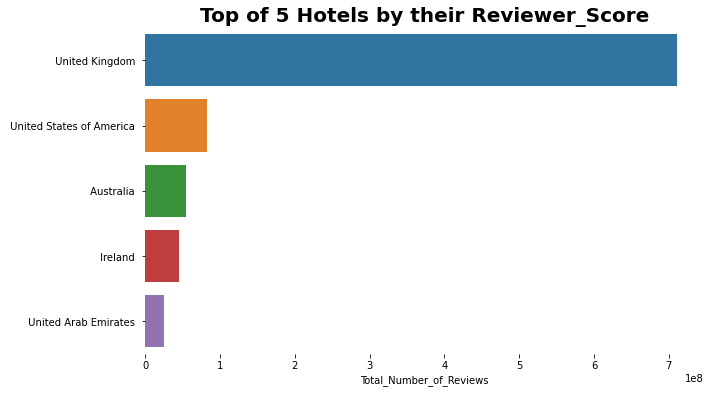

In [ ]:
plt.figure(figsize=(10,6))
Reviews_by_Total_Number_of_Reviews=df.groupby('Reviewer_Nationality').sum().Total_Number_of_Reviews.sort_values(ascending=False).head(5).to_frame().reset_index()
sns.barplot(data=Reviews_by_Total_Number_of_Reviews,y='Reviewer_Nationality',x='Total_Number_of_Reviews')
sns.despine(top=1,bottom=1,left=1,right=1)
plt.ylabel('')
plt.title('Top of 5 Hotels by their Reviewer_Score',fontweight='bold',fontsize=20)
plt.show()

In [ ]:
df=df.drop(["Average_Score","Hotel_Name","Reviewer_Nationality","Total_Number_of_Reviews","Total_Number_of_Reviews_Reviewer_Has_Given","Reviewer_Score","Reviewer_Score","Hotel_Address","lat","lng","Tags","days_since_review","Additional_Number_of_Scoring","Review_Date"],axis=1)

In [ ]:
df[df["Negative_Review"]== "No Negative"].index
df[df["Positive_Review"] == "No Positive"].index
df[df["Negative_Review"]== "Nothing"].index
df[df["Negative_Review"]== "none"].index
df[df["Positive_Review"]== "Nothing"].index
df[df["Positive_Review"]== "none"].index


df.drop(df[df['Negative_Review'] == "No Negative" ].index , inplace=True)
df.drop(df[df['Positive_Review'] == "No Positive" ].index , inplace=True) 
df.drop(df[df['Negative_Review'] == "Nothing" ].index , inplace=True)
df.drop(df[df['Positive_Review'] == "nothing" ].index , inplace=True) 

In [ ]:
df.drop(df[df['Review_Total_Negative_Word_Counts'] > 40 ].index , inplace=True)
df.drop(df[df['Review_Total_Negative_Word_Counts'] > 40 ].index , inplace=True) 
df.drop(df[df['Review_Total_Positive_Word_Counts'] > 40 ].index , inplace=True)

In [ ]:
df['Review_Total_Negative_Word_Counts'] = -1 * df['Review_Total_Negative_Word_Counts']

In [ ]:
Negative_and_Positive_Reviews = df['Negative_Review'].to_list() + df['Positive_Review'].to_list()

In [ ]:
Negative_and_Positive_words_count = df['Review_Total_Negative_Word_Counts'].to_list() + df['Review_Total_Positive_Word_Counts'].to_list()

In [ ]:
data = {'Negative_and_Positive_Reviews': Negative_and_Positive_Reviews, 'Negative_and_Positive_words_count': Negative_and_Positive_words_count}  

In [ ]:
final_df = pd.DataFrame(data) 
final_df

,Negative_and_Positive_Reviews,Negative_and_Positive_words_count
0,Backyard of the hotel is total mess shouldn t...,-17
1,Cleaner did not change our sheet and duvet ev...,-33
2,Apart from the price for the brekfast Everyth...,-11
3,The floor in my room was filfy dirty Very bas...,-28
4,The staff in the restaurant could of been mor...,-35
...,...,...
539327,large room,3
539328,Good breakfast,3
539329,location,2
539330,Breakfast was ok and we got earlier check in,11


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

X = [[final_df['Negative_and_Positive_words_count'][i]] for i in range (len(final_df['Negative_and_Positive_words_count']))]
normalisation_words_count = MinMaxScaler().fit_transform(X)

In [ ]:
normalisation_words_count = np.array(normalisation_words_count)
normalisation_words_count

array([[0.2875],
       [0.0875],
       [0.3625],
       ...,
       [0.525 ],
       [0.6375],
       [0.575 ]])

In [ ]:
normalisation_words_count = np.where(normalisation_words_count < 0.2, 1, normalisation_words_count)
normalisation_words_count = np.where(normalisation_words_count < 0.4, 2, normalisation_words_count)
normalisation_words_count = np.where(normalisation_words_count < 0.6, 3, normalisation_words_count)
normalisation_words_count = np.where(normalisation_words_count < 0.8, 4, normalisation_words_count)
normalisation_words_count = np.where(normalisation_words_count < 1, 5, normalisation_words_count)

In [ ]:
normalisation_words_count

array([[2.],
       [1.],
       [2.],
       ...,
       [3.],
       [4.],
       [3.]])

In [ ]:
data = {'Negative_and_Positive_Reviews': Negative_and_Positive_Reviews, 'normalisation_words_count': normalisation_words_count.reshape(-1)} 
final_df = pd.DataFrame(data) 
final_df 

,Negative_and_Positive_Reviews,normalisation_words_count
0,Backyard of the hotel is total mess shouldn t...,2.0
1,Cleaner did not change our sheet and duvet ev...,1.0
2,Apart from the price for the brekfast Everyth...,2.0
3,The floor in my room was filfy dirty Very bas...,1.0
4,The staff in the restaurant could of been mor...,1.0
...,...,...
539327,large room,3.0
539328,Good breakfast,3.0
539329,location,3.0
539330,Breakfast was ok and we got earlier check in,4.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


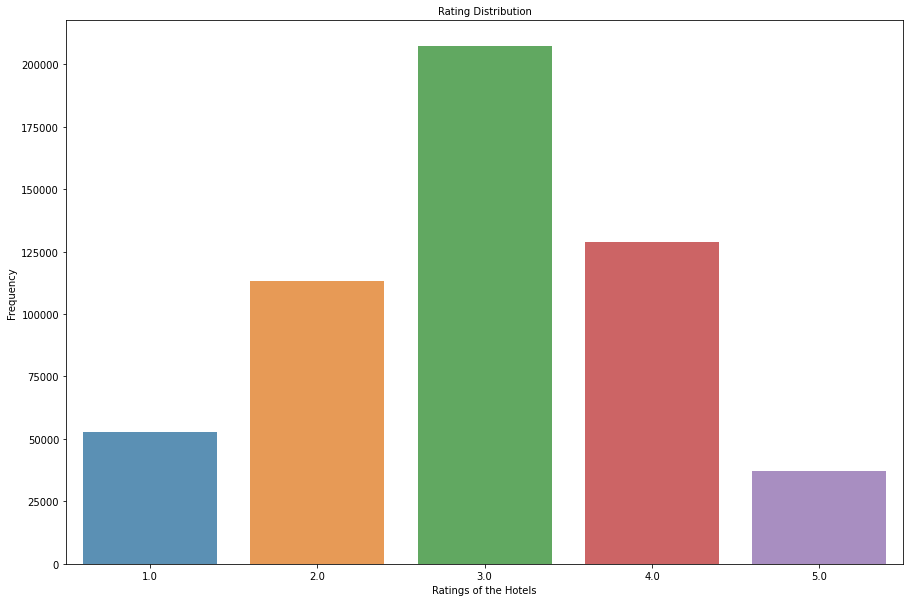

In [ ]:
x_rating = final_df.normalisation_words_count.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Ratings of the Hotels', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

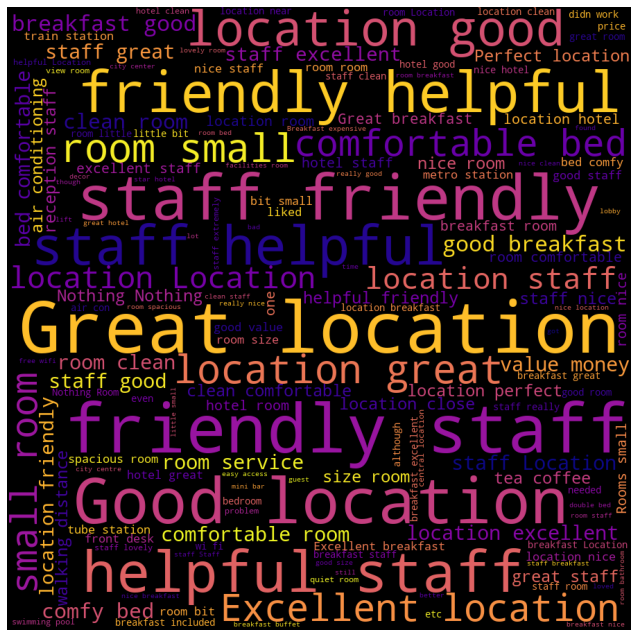

In [ ]:
reviews = pd.Series(final_df["Negative_and_Positive_Reviews"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = wordcloud.WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [ ]:
dataset1 = final_df.copy()
dataset1['Negative_and_Positive_Reviews'] = dataset1['Negative_and_Positive_Reviews'].apply(str)
dataset1['ReviewLength'] = dataset1['Negative_and_Positive_Reviews'].apply(lambda w : len(re.findall(r'\w+', w)))
dataset1.head()

,Negative_and_Positive_Reviews,normalisation_words_count,ReviewLength
0,Backyard of the hotel is total mess shouldn t...,2.0,15
1,Cleaner did not change our sheet and duvet ev...,1.0,31
2,Apart from the price for the brekfast Everyth...,2.0,10
3,The floor in my room was filfy dirty Very bas...,1.0,26
4,The staff in the restaurant could of been mor...,1.0,33


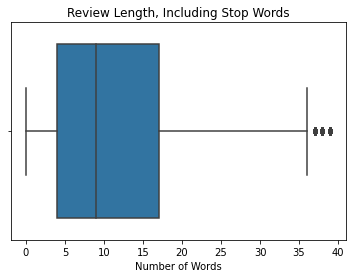

In [ ]:
sns.boxplot(data = dataset1, x = "ReviewLength")
plt.xlabel('Number of Words')
plt.title('Review Length, Including Stop Words')
plt.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-z\s]', '', text)
    text = text.strip()
    text = re.sub(" +", " ", text)
    return text
clean_text(' it s impossible to do it !!!!?? ')


'it s impossible to do it'

In [ ]:
hotel_df = final_df.copy()
stop_words = stopwords.words("english")

In [ ]:
def global_clean(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens]
    print(tokens)
    return tokens
global_clean("it s impossible to do allll that ???::!!;")    

['it', 's', 'impossible', 'to', 'do', 'allll', 'that']


['it', 's', 'impossible', 'to', 'do', 'allll', 'that']

In [ ]:
final_df["Negative_and_Positive_Reviews_V"]=final_df["Negative_and_Positive_Reviews"].apply(lambda x: global_clean(x) )


Streaming output truncated to the last 5000 lines.
['location', 'reception', 'staff']
['bed', 'is', 'very', 'comfortable', 'breakfast', 'is', 'ok']
['bathroom', 'coffee', 'shop', 'room', 'service']
['sushi', 'restaurant', 'was', 'great']
['the', 'view', 'from', 'the', 'room', 'was', 'amazing']
['bed', 'extremely', 'comfortable', 'quiet', 'room']
['everything', 'else']
['excellent', 'hotel', 'location', 'and', 'public', 'areas']
['location']
['view', 'was', 'great', 'from', 'the', 'upgrade', 'to', 'seeing', 'westminster']
['very', 'handy', 'to', 'the', 'city', 'comfy', 'bed']
['great', 'location', 'friendly', 'staff', 'nice', 'pool', 'good', 'breakfast']
['the', 'location', 'the', 'cocktail', 'bar']
['it', 'all']
['we', 'had', 'a', 'fantastic', 'room', 'great', 'view', 'of', 'westminster', 'bridge', 'great', 'facilities', 'excellent', 'breakfast', 'overall', 'fantastic', 'stay']
['comfortable', 'room', 'great', 'staff', 'and', 'bar', 'staff']
['very', 'efficient', 'service']
['spacious'

In [ ]:
sample_text = data['Negative_and_Positive_Reviews'][:3]
for Negative_and_Positive_Reviews in sample_text: print(Negative_and_Positive_Reviews)

 Backyard of the hotel is total mess shouldn t happen in hotel with 4 stars 
 Cleaner did not change our sheet and duvet everyday but just made bed They also didn t clean the floor and changed the body gel when we run out of it 
 Apart from the price for the brekfast Everything very good


In [ ]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sample_text)
vectorizer.vocabulary_

{'Apart': 0,
 'Backyard': 1,
 'Cleaner': 2,
 'Everything': 3,
 'They': 4,
 'also': 5,
 'and': 6,
 'bed': 7,
 'body': 8,
 'brekfast': 9,
 'but': 10,
 'change': 11,
 'changed': 12,
 'clean': 13,
 'did': 14,
 'didn': 15,
 'duvet': 16,
 'everyday': 17,
 'floor': 18,
 'for': 19,
 'from': 20,
 'gel': 21,
 'good': 22,
 'happen': 23,
 'hotel': 24,
 'in': 25,
 'is': 26,
 'it': 27,
 'just': 28,
 'made': 29,
 'mess': 30,
 'not': 31,
 'of': 32,
 'our': 33,
 'out': 34,
 'price': 35,
 'run': 36,
 'sheet': 37,
 'shouldn': 38,
 'stars': 39,
 'the': 40,
 'total': 41,
 'very': 42,
 'we': 43,
 'when': 44,
 'with': 45}

In [ ]:
vectorizer.transform(sample_text).toarray()


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 1],
       [0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1,
        1, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0,
        0, 0]])

In [ ]:
sentences = final_df['Negative_and_Positive_Reviews'].values
y = final_df['normalisation_words_count'].values

# diviser les données
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                    test_size=0.25, 
                                                                    random_state=1000, 
                                                                    shuffle=True)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [ ]:
print("le format final de nos données d'entraînement est:\n\n",X_train)
print("le format final de nos données de test est:\n\n",X_test)




le format final de nos données d'entraînement est:

   (0, 3164)	1
  (0, 3834)	1
  (0, 3881)	1
  (0, 5323)	1
  (0, 5789)	2
  (0, 6602)	1
  (0, 8854)	1
  (0, 12227)	1
  (0, 15597)	1
  (0, 18380)	1
  (0, 19873)	1
  (0, 20823)	1
  (0, 25394)	1
  (0, 30791)	2
  (0, 36051)	1
  (0, 36101)	1
  (0, 36134)	1
  (0, 37329)	1
  (0, 39415)	1
  (0, 39656)	1
  (1, 25021)	1
  (2, 3164)	1
  (2, 15949)	1
  (2, 17676)	1
  (2, 17875)	1
  :	:
  (404497, 14787)	1
  (404497, 18380)	1
  (404497, 18614)	1
  (404497, 18965)	1
  (404497, 19873)	2
  (404497, 21929)	1
  (404497, 22582)	1
  (404497, 22968)	1
  (404497, 24861)	1
  (404497, 25394)	1
  (404497, 25587)	1
  (404497, 29896)	1
  (404497, 30842)	1
  (404497, 35957)	1
  (404497, 35967)	2
  (404497, 36156)	1
  (404497, 37602)	1
  (404497, 38528)	1
  (404497, 38698)	1
  (404497, 40111)	1
  (404498, 3628)	1
  (404498, 5483)	1
  (404498, 14787)	1
  (404498, 16015)	1
  (404498, 36746)	1
le format final de nos données de test est:

   (0, 3164)	1
  (0, 4977)	1
  

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)

model_1.fit(X_train,y_train)
model_1.score(X_test,y_test)



0.8796659571469893

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
model = BaggingClassifier(base_estimator=SGDClassifier(),
                         n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8822172613529329

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(sentences, y, test_size=0.25)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_val  = vectorizer.transform(X_val)

In [ ]:
input_dim = X_train.shape[1]  # Number of features

ANN_model = Sequential()
ANN_model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
ANN_model.add(layers.Dense(2, activation='softmax'))   


In [ ]:
ANN_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer = "adam", 
                  metrics = ["accuracy"])

In [ ]:
ANN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                404970    
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 404,992
Trainable params: 404,992
Non-trainable params: 0
_________________________________________________________________
